In [1]:
# Load local libraries
import __load_libs
from src.df_io import from_csv
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

# Problem 5. Feature manipulation

In [2]:
patients_df = from_csv('../data/04_data_analyzed.csv')

## FEV1/FVC ratio

In `03_data_cleaning.ipynb` we created a new column `fev1_fvc_ratio`. It is a derivative of `lung_function_fev1` and `lung_function_fvc`. Basically, for model training we don't need these two columns anymore, so we can freely drop them.

In [3]:
# Dropping the original LungFunctionFEV1 and LungFunctionFVC columns
patients_df = patients_df.drop(columns=['lung_function_fev1', 'lung_function_fvc'])

In [4]:
patients_df.shape

(2017, 26)

## SMOTE

As seen in previous steps the data is highly imbalanced. One of the approaches for such cases is SMOTE.

In [5]:
X = patients_df.drop(columns=['diagnosis'])
y = patients_df['diagnosis']

# Convert all categorical columns to int values, since they are strings at the moment.
for col in X.columns:
    if X[col].dtype == 'category':
        X[col] = X[col].astype(float)

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Training set classes distribution: {y_train.value_counts()}")

print(f"\nTest set shape: {X_test.shape}")
print(f"Test set classes distribution: {y_test.value_counts()}")

Training set shape: (1613, 25)
Training set classes distribution: diagnosis
0    1527
1      86
Name: count, dtype: int64

Test set shape: (404, 25)
Test set classes distribution: diagnosis
0    383
1     21
Name: count, dtype: int64


In [7]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Training

Let's experiment with fitting the data into a model.

In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Calculate accuracy, confusion matrix and Predict classes for the test set
accuracy = model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
# Print classification report for the model
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75       383
           1       0.03      0.24      0.06        21

    accuracy                           0.60       404
   macro avg       0.48      0.43      0.40       404
weighted avg       0.89      0.60      0.71       404



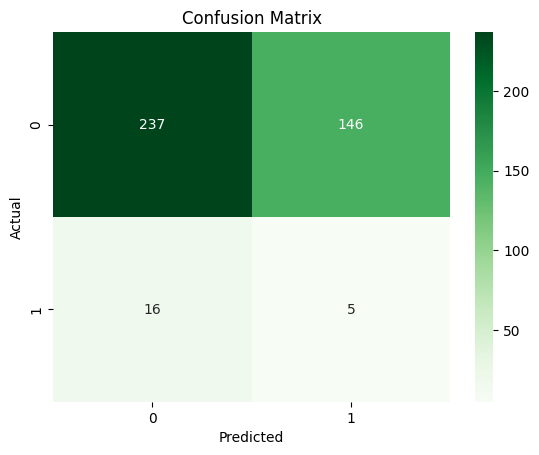

In [10]:
conf_mtrx = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix with seaborn
sns.heatmap(conf_mtrx, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* **OBSERVATION**: Very poor results. More data analysis and feature engineering are required. :)